In [1]:
import pandas as pd
import numpy as np
#import tensorflow as tf
#from tensorflow import keras
import matplotlib.pyplot as plt
#from random import randrange, shuffle
from os import path
#import librosa
#from librosa.display import specshow
#import IPython.display as ipd
#from math import floor
#import time

In [2]:
csvPath = r"F:\labeled_audio_data.csv"
dataFrame  = pd.read_csv(csvPath)
dataDict   = dataFrame.to_dict()

In [3]:
for key in dataFrame.keys():
    print("Key Name: " + key)
    try:
        print("Mean:    ", round(dataFrame[key].mean(), 3))
    except:
        pass
    print()
    


Key Name: Unnamed: 0
Mean:     4165.0

Key Name: filename

Key Name: mainSound

Key Name: length
Mean:     4.462

Key Name: sampleRate
Mean:     42074.556

Key Name: quality
Mean:     6.683

Key Name: isCut
Mean:     0.921

Key Name: isMixed
Mean:     0.079

Key Name: isChecked
Mean:     0.228

Key Name: threat
Mean:     2.571

Key Name: salience
Mean:     6.125

Key Name: importance
Mean:     2.668



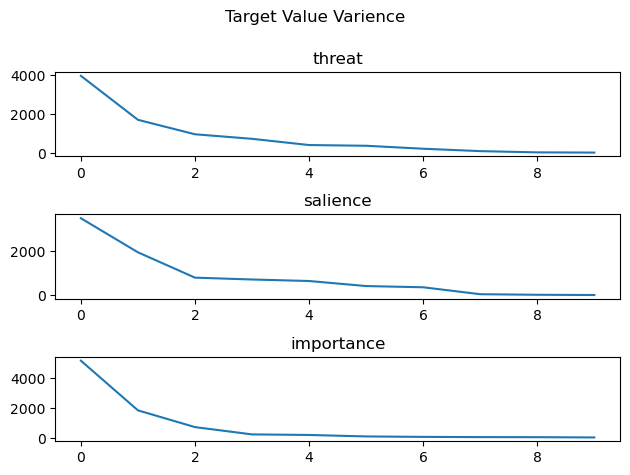

In [5]:
targetValues= ["threat", "salience", "importance"]
fig, axs = plt.subplots(3)
fig.suptitle("Target Value Varience")
for i in range(3):
    axs[i].set_title(targetValues[i])
    allValues = list(dataDict[dataFrame.keys()[i-3]].values())
    allValuesSet = list(set(allValues))
    count = []
    for s in allValuesSet:
        count.append(allValues.count(s))
        
    count.sort(reverse = True)
    axs[i].plot(count)
fig.tight_layout()
fig.subplots_adjust(top=0.85)